In [58]:
import pandas as pd
import geopandas as gpd
import movingpandas as mpd

from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

In [77]:
gdf = gpd.read_file('ais (4).gpkg')

In [78]:
gdf.head()

,Timestamp,MMSI,NavStatus,SOG,COG,Name,ShipType,geometry
0,05/07/2017 00:00:03,219632000,Under way using engine,0.0,270.4,NaN,Undefined,POINT (11.85958 57.68817)
1,05/07/2017 00:00:05,265650970,Under way using engine,0.0,0.5,NaN,Undefined,POINT (11.84175 57.66150)
2,05/07/2017 00:00:06,265503900,Under way using engine,0.0,0.0,NaN,Undefined,POINT (11.90650 57.69077)
3,05/07/2017 00:00:14,219632000,Under way using engine,0.0,188.4,NaN,Undefined,POINT (11.85958 57.68817)
4,05/07/2017 00:00:19,265519650,Under way using engine,0.0,357.2,NaN,Undefined,POINT (11.87192 57.68233)


In [79]:
gdf['t'] = pd.to_datetime(gdf['Timestamp'], format='%d/%m/%Y %H:%M:%S')
traj_collection = mpd.TrajectoryCollection(gdf, 'MMSI', t='t', min_length=100)
print(f"Finished creating {len(traj_collection)} trajectories")

Finished creating 88 trajectories


In [80]:
traj_collection = mpd.MinTimeDeltaGeneralizer(traj_collection).generalize(tolerance=timedelta(minutes=1))

In [82]:
my_traj = traj_collection.trajectories[0]
my_traj.df.head()

,Timestamp,MMSI,NavStatus,SOG,COG,Name,ShipType,geometry
t,,,,,,,,
2017-07-05 17:32:18,05/07/2017 17:32:18,210035000,Under way using engine,9.8,52.8,NORDIC HAMBURG,Cargo,POINT (11.80462 57.67612)
2017-07-05 17:33:18,05/07/2017 17:33:18,210035000,Under way using engine,9.5,58.9,NORDIC HAMBURG,Cargo,POINT (11.80875 57.67773)
2017-07-05 17:34:18,05/07/2017 17:34:18,210035000,Under way using engine,9.3,70.5,NORDIC HAMBURG,Cargo,POINT (11.81311 57.67879)
2017-07-05 17:35:28,05/07/2017 17:35:28,210035000,Under way using engine,9.5,71.1,NORDIC HAMBURG,Cargo,POINT (11.81855 57.67968)
2017-07-05 17:36:28,05/07/2017 17:36:28,210035000,Under way using engine,9.4,71.3,NORDIC HAMBURG,Cargo,POINT (11.82334 57.68044)


<Axes: >

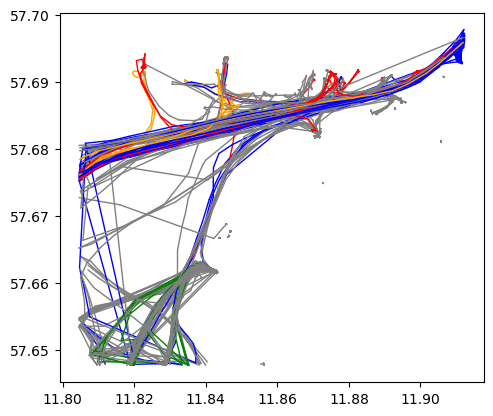

In [65]:
shiptype_to_color = {'Passenger': 'blue', 'HSC': 'green', 'Tanker': 'red', 'Cargo': 'orange'}
traj_collection.plot(column='ShipType', column_to_color=shiptype_to_color, linewidth=1, capstyle='round')

<Axes: >

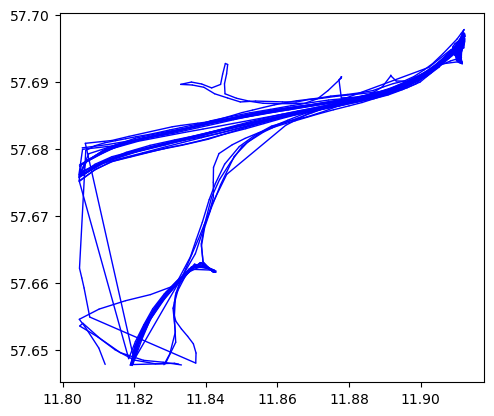

In [66]:
passenger = traj_collection.filter('ShipType', 'Passenger')
#passenger.hvplot(title='Passenger ferries', line_width=2, frame_width=700, frame_height=500)
passenger.plot(column='ShipType', column_to_color=shiptype_to_color, linewidth=1, capstyle='round')

In [67]:
p_gdf = passenger.to_traj_gdf()
p_gdf

,traj_id,start_t,end_t,geometry,length,direction
0,265177000,2017-07-05 06:10:46,2017-07-05 21:01:58,"LINESTRING (11.91218 57.69648, 11.90813 57.694...",27849.597456,217.113185
1,265360000,2017-07-05 08:15:13,2017-07-05 19:53:33,"LINESTRING (11.91200 57.69588, 11.90857 57.694...",32003.277110,211.751352
2,265410000,2017-07-05 00:49:58,2017-07-05 19:13:55,"LINESTRING (11.80454 57.67571, 11.81178 57.678...",41580.105232,3.826013
3,265501910,2017-07-05 11:28:02,2017-07-05 13:17:03,"LINESTRING (11.91143 57.69366, 11.90836 57.693...",11687.759509,332.556269
4,265507770,2017-07-05 05:11:17,2017-07-05 06:18:04,"LINESTRING (11.83319 57.64774, 11.82809 57.648...",3731.738743,286.578388
5,265509950,2017-07-05 02:40:27,2017-07-05 17:42:04,"LINESTRING (11.81188 57.64782, 11.81011 57.650...",46796.307693,90.267019
6,265514120,2017-07-05 04:24:28,2017-07-05 20:02:21,"LINESTRING (11.91222 57.69637, 11.91092 57.695...",15189.521421,6.794244
7,265514130,2017-07-05 07:54:15,2017-07-05 22:02:55,"LINESTRING (11.91194 57.69722, 11.90979 57.694...",12185.607010,171.049285
8,265547220,2017-07-05 04:53:52,2017-07-05 07:04:04,"LINESTRING (11.91179 57.69663, 11.91056 57.693...",3060.385118,348.259823
9,265579090,2017-07-05 16:55:09,2017-07-05 20:37:10,"LINESTRING (11.91219 57.69783, 11.91135 57.697...",19799.268354,180.168516


In [68]:
print(p_gdf['geometry'][0])

LINESTRING (11.912177 57.696482, 11.908133 57.694138, 11.904877 57.692533, 11.901242 57.691183, 11.897312 57.690125, 11.893198 57.689248, 11.88893 57.688493, 11.884485 57.687855, 11.879493 57.687342, 11.874957 57.68697, 11.87042 57.686595, 11.865885 57.6862, 11.861192 57.68581, 11.856712 57.685357, 11.852217 57.68486, 11.847732 57.684358, 11.843257 57.683808, 11.837812 57.683165, 11.831115 57.682357, 11.823303 57.681537, 11.815207 57.680647, 11.807288 57.679277, 11.804638 57.675848, 11.812253 57.678095, 11.820478 57.679528, 11.828763 57.680607, 11.835912 57.68161, 11.842573 57.682505, 11.848392 57.68327, 11.85308 57.683903, 11.858227 57.684568, 11.862702 57.685118, 11.867237 57.685672, 11.871922 57.68615, 11.877215 57.68672, 11.881663 57.687178, 11.88588 57.687625, 11.89049 57.688183, 11.894485 57.689062, 11.89831 57.689925, 11.901797 57.691013, 11.904897 57.692458, 11.907695 57.69403, 11.91059 57.695643, 11.912318 57.696357, 11.908088 57.693973, 11.90518 57.692222, 11.901648 57.69082,

In [69]:
# Drop the timestamp columns
p_gdf = p_gdf.drop(columns=['start_t', 'end_t'])

In [70]:
# Use folium
import folium
from folium import plugins

m = folium.Map(location=[55.5, 10.5], zoom_start=9, tiles='cartodbpositron')
# plugins.TimestampedGeoJson(
#     p_gdf.to_json(),
#     period='PT1M',
#     duration='PT1M',
#     transition_time=1000,
#     auto_play=True,
#     add_last_point=True,
#     loop=False,
#     max_speed=1,
#     loop_button=True,
#     date_options='YYYY/MM/DD HH:mm:ss',
#     time_slider_drag_update=True,
#     duration_slider=True,
#     duration_slider_height='50px',
#     position='bottomleft',
# ).add_to(m)



# Add p_gdf to the map
folium.GeoJson(p_gdf).add_to(m)

m.fit_bounds(m.get_bounds())



In [71]:
m

In [72]:
traj_collection.trajectories[0]

Trajectory 210035000 (2017-07-05 17:32:18 to 2017-07-05 23:58:04) | Size: 147 | Length: 3234.5m
Bounds: (11.80462, 57.676125, 11.845715, 57.689613)
LINESTRING (11.80462 57.676125, 11.808747 57.677728, 11.813108 57.67879, 11.818548 57.67968, 11.8233

In [73]:
my_traj = traj_collection.trajectories[0]
my_traj_gdf = my_traj.to_traj_gdf()
my_traj_gdf.drop(columns=['start_t', 'end_t'], inplace=True)


In [74]:
my_traj_gdf

,traj_id,geometry,length,direction
0,210035000,"LINESTRING (11.80462 57.67612, 11.80875 57.677...",3234.494884,58.498481


<Axes: >

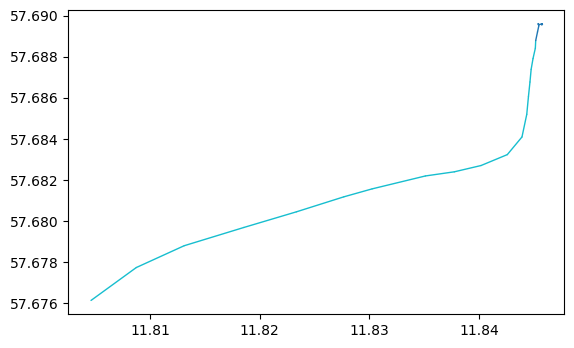

In [75]:
#my_traj.hvplot(title=f'Trajectory {my_traj.id}', frame_width=700, frame_height=500, line_width=5.0, c='NavStatus', cmap='Dark2') 
my_traj.plot(column='NavStatus', linewidth=1, capstyle='round')


In [76]:

traj_map = folium.Map(location=[55.5, 10.5], zoom_start=9, tiles='cartodbpositron')
#folium.GeoJson(my_traj_gdf).add_to(traj_map)
# Color by NavStatus
# Get a color map
import matplotlib.cm as cm
import matplotlib.colors as colors
cmap = cm.get_cmap('Dark2')
# Get the number of unique values in the NavStatus column
num_colors = len(my_traj_gdf['NavStatus'].unique())
# Get a list of colors
navstatus_colors = [colors.rgb2hex(cmap(i)) for i in range(num_colors)]
# Create a dictionary of NavStatus values and colors
navstatus_color_dict = dict(zip(my_traj_gdf['NavStatus'].unique(), navstatus_colors))
# Add the color column to the GeoDataFrame
my_traj_gdf['color'] = my_traj_gdf['NavStatus'].map(navstatus_color_dict)
# Add the GeoDataFrame to the map
folium.GeoJson(my_traj_gdf, style_function=lambda x: {'color': x['properties']['color']}).add_to(traj_map)
traj_map.fit_bounds(traj_map.get_bounds())

KeyError: 'NavStatus'

In [48]:
traj_map